# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [3]:
import math
from ROOT import *
import numpy as np
from array import array

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [4]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) Definition of random number generation and limits

In [21]:
# Parameters of the gaussian distribution

mean = 0
sigma = 1

# Considered limits

limlow = np.array([mean-sigma, mean-2*sigma,mean-3*sigma,mean-4*sigma,mean-5*sigma])
limhig = np.array([mean+sigma, mean+2*sigma,mean+3*sigma,mean+4*sigma,mean+5*sigma])

# Number generation procedure

def myrnd(N=1):
    
    rvec = np.random.normal(mean,sigma, size=(N))

    return rvec


### (3) Generate multiple numbers

In [22]:
Nmc = 100000000

rvec = myrnd(Nmc)

### (4)  Count limit probability

In [23]:
print("\nLower limit probability:")

for ll in limlow :
    nl = np.sum(rvec < ll)
    p = nl/Nmc
    ep = sqrt(p*(1-p)/Nmc)
    print (" P ( x < ",ll,") = ",p," +/- ",ep)
    
print("\nUpper limit probability:")

for ul in limhig :
    nl = np.sum(rvec > ul)
    p = nl/Nmc
    ep = sqrt(p*(1-p)/Nmc)
    print (" P ( x > ",ul,") = ",p," +/- ",ep)
    


Lower limit probability:
 P ( x <  -1 ) =  0.15864225  +/-  3.65342149929265e-05
 P ( x <  -2 ) =  0.0227686  +/-  1.4916497864458667e-05
 P ( x <  -3 ) =  0.00134872  +/-  3.6700149241680208e-06
 P ( x <  -4 ) =  3.204e-05  +/-  5.660297999080967e-07
 P ( x <  -5 ) =  3.2e-07  +/-  5.6568533443956274e-08

Upper limit probability:
 P ( x >  1 ) =  0.15861607  +/-  3.6531768686686263e-05
 P ( x >  2 ) =  0.02275479  +/-  1.4912078839670846e-05
 P ( x >  3 ) =  0.00135162  +/-  3.6739530799611474e-06
 P ( x >  4 ) =  3.263e-05  +/-  5.712174304334558e-07
 P ( x >  5 ) =  2.8e-07  +/-  5.291501881318762e-08


### (5) Fill distribution histogram

In [24]:
# Histogram to collect results

Xmin=-10
Xmax=10
Nbin = 100
dX=(Xmax-Xmin)/Nbin

hexp = TH1D('hexp','Probability distribution from MC',Nbin, Xmin, Xmax)

# Main experiment loop

wexp = 1./Nmc/dX

for r in  rvec:
    hexp.Fill(r,wexp)
    

### (6) Plot histogranm

Mean value:  -0.00013662678149683186


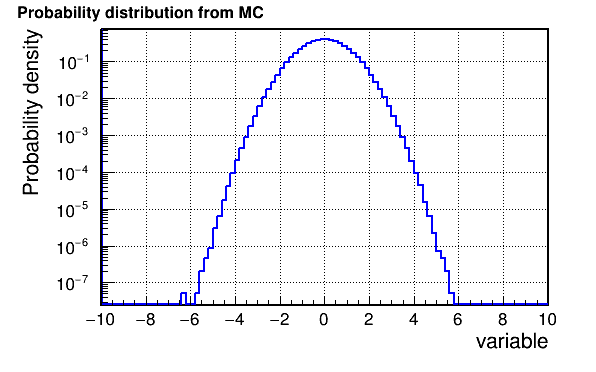

Info in <TCanvas::Print>: png file 05_interval.png has been created


In [25]:
# Log scale

gStyle.SetOptLogy(1)

# Create plot canvas

cexp = TCanvas('cexp')
   
# Axis description

hexp.GetXaxis().SetTitle("variable")
hexp.GetYaxis().SetTitle("Probability density")

# No statistics

hexp.SetStats(0)

print('Mean value: ',hexp.GetMean())

# Plot style

hexp.SetMarkerStyle(20)
hexp.DrawCopy('HIST')

cexp.Update()
fname = '05_interval.png'
cexp.Print(fname)

Image(filename=fname)